# РОБОТА із ЗОБРАЖЕННЯМИ 
## Файл: Image_06_002
## Морфологічні перетворення. Обчислення характеристик (площа, центр тяжиння)

In [1]:
## Завантаження пакетів
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
plt.rcParams['font.size'] = 10

In [2]:
# Визначення та друк параметрів зображення
def image_data (image):
    rank     = len(image.shape)
    rows_num = image.shape[0] ## кількість рядків
    clms_num = image.shape[1] ## кількість колонок
    chen_num = 1
    if rank == 3: 
        chen_num = image.shape[2] ## кількість каналів
    print('Опис зображення ')
    print('IMAGE RANK',  rank)
    print('IMAGE SHAPE', image.shape)
    print('DATA Type',   image.dtype)
    return rows_num,clms_num, chen_num

In [3]:
# Відобрадження обраного зображення
def image1_view (image, image_name):
    fig, ax = plt.subplots(figsize=(4, 4))
    plt.title(image_name)
    plt.imshow(image)
    plt.show()
    return 

In [4]:
# Відобрадження двох зображень длчя порівняння
def image2_view (image1, image2, image1_name, image2_name):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    ax = axes.ravel()
    ax[0].set_title(image1_name)
    ax[0].imshow(image1)
    ax[1].set_title(image2_name)
    ax[1].imshow(image2)
    plt.show()
    return

#### Загальна площа зображення

Опис зображення 
IMAGE RANK 3
IMAGE SHAPE (200, 200, 3)
DATA Type uint8


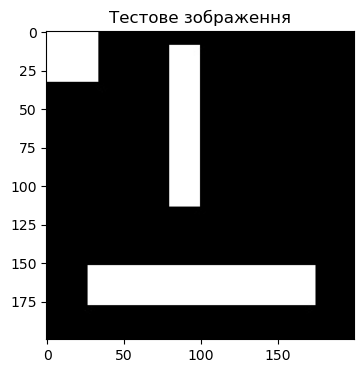

In [5]:
## Завантаження файлу зображення
filename1 = 'Morfo_BW_1.jpg' 
path = './IMAGES/'
test_im = io.imread(path+filename1)

## Визначення стркутури та розміру зображення
rows_num, clms_num, chan = image_data (test_im)

# Робимо виключно BW зображення
test_im_ = np.full ((rows_num, clms_num, 3), (0, 0, 0) , dtype=np.uint8) 

for i in  range (rows_num):
    for j in  range (clms_num):
        if test_im [i, j, 0] > 126 : test_im_ [i, j, :] = [255,255,255]
      
# Відобрадження обраного зображення
image1_view (test_im, 'Тестове зображення')

#### Площаь "білої" то "чорної" частин зображення

In [6]:
Square_White = 0
Square_Black = 0

for i in  range (rows_num):
    for j in  range (clms_num):
        if test_im_ [i, j, 0] == 255: Square_White += 1
        if test_im_ [i, j, 0] == 0:   Square_Black += 1
            
print ('Площа обєкту', Square_White)
print ('Площа фону', Square_Black)
print ('Загальна площа', Square_Black+Square_White)
sq_rwl = Square_White /(rows_num*clms_num)
print ('Відносна площа',sq_rwl )


Площа обєкту 7070
Площа фону 32930
Загальна площа 40000
Відносна площа 0.17675


#### Завантаження файлу: область = ЕЛІПС
#### Розмір зображення 500 px X 500 px
#### Розмір еліпсу  300 px X 200 px
#### Центр еліпсу: Xc = 200; Yc = 250 

Опис зображення 
IMAGE RANK 3
IMAGE SHAPE (500, 500, 3)
DATA Type uint8


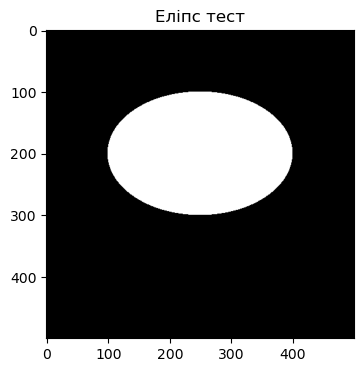

In [7]:
## Завантаження файлу зображення для розрахунку центра тяжиння
filename2 = 'Geom_Test_1.png' 
path = './IMAGES/'
stest_im  = io.imread(path+filename2)

## Визначення стркутури та розміру зображення
srows_num, sclms_num, chan = image_data (stest_im)

# Перетворюємо до BW зображення
stest_im_ = np.full ((srows_num, sclms_num, 3), (0, 0, 0) , dtype=np.uint8) 

for i in  range (srows_num):
    for j in  range (sclms_num):
        if stest_im [i, j, 0] > 126 : stest_im_ [i, j, :] = [255,255,255]

# Відобрадження обраного зображення
image1_view (stest_im_, 'Еліпс тест')

#### Площаь "білої" то "чорної" частин зображення

In [8]:
# Вычисляем площадь эллипса
Square_White = 0
Square_Black = 0

for i in  range (srows_num):
    for j in  range (sclms_num):
        if stest_im_ [i, j, 0] == 255: Square_White += 1
        if stest_im_ [i, j, 0] == 0:   Square_Black += 1
            
print ('Площа області', Square_White)
print ('Площа фонау', Square_Black)
print ('Загальна площа', Square_Black+Square_White)

Площа області 47364
Площа фонау 202636
Загальна площа 250000


#### Центр тяжиння

In [9]:
scentr_y = 0 
scentr_x = 0 

for i in  range (srows_num):
    for j in  range (sclms_num):
        if stest_im_ [i, j, 0] == 255 : scentr_y += j 
        if stest_im_ [i, j, 0] == 255 : scentr_x += i 
           
sentr_y = scentr_y / Square_White     
sentr_x = scentr_x / Square_White     
       
print ('Центр тяжести: Координата X:', sentr_x, 'Координата Y:',sentr_y)

Центр тяжести: Координата X: 199.5 Координата Y: 249.5


#### Завантаження зображення: довільна однозвязна область
#### Размір зображення 500 px X 500 px

Опис зображення 
IMAGE RANK 3
IMAGE SHAPE (500, 500, 3)
DATA Type uint8


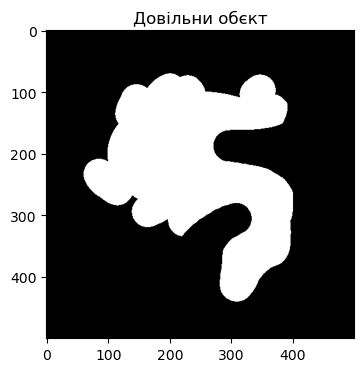

In [10]:
## Завантаження файлу зображення ДЛЯ РАСЧЕТА ЦЕНТРА ТЯЖЕСТИ
filename3 = 'Geom_Test_3.png' 
path = './IMAGES/'
sstest_im = io.imread(path + filename3)

ssrows_num, ssclms_num, chan = image_data (sstest_im) 

# Перетворюємо до BW зображення
sstest_im_ = np.full ((ssrows_num, ssclms_num, 3), (0, 0, 0) , dtype=np.uint8) 

for i in  range (ssrows_num):
    for j in  range (ssclms_num):
        if sstest_im [i, j, 0] > 126 : sstest_im_ [i, j, :] = [255,255,255]

# Відобрадження обраного зображення
image1_view (sstest_im_, 'Довільни обєкт')

#### Площаь "білої" то "чорної" частин зображення

In [11]:
# Обчислюємо площу
Square_White = 0
Square_Black = 0

for i in  range (ssrows_num):
    for j in  range (ssclms_num):
        if sstest_im_ [i, j, 0] == 255: Square_White += 1
        if sstest_im_ [i, j, 0] == 0:   Square_Black += 1
            
print ('Площа області', Square_White)
print ('Площа фону', Square_Black)
print ('Загальн площа', Square_Black+Square_White)

Площа області 66801
Площа фону 183199
Загальн площа 250000


#### Центр тяжиння

In [12]:
scentr_y = 0
scentr_x = 0 

for i in  range (ssrows_num):
    for j in  range (ssclms_num):
        if sstest_im_ [i, j, 0] == 255 : scentr_y += j 
        if sstest_im_ [i, j, 0] == 255 : scentr_x += i 

            
sentr_y = np.int32(scentr_y / Square_White )    
sentr_x = np.int32(scentr_x / Square_White )    
       
print ('Центр тяжиння: Координата X:', sentr_x, 'Координата Y:',sentr_y)

Центр тяжиння: Координата X: 225 Координата Y: 247


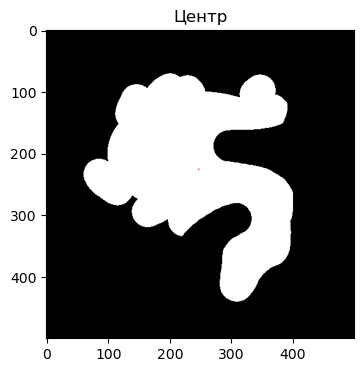

In [13]:
sstest_im_[sentr_x:sentr_x+2, sentr_y:sentr_y+2,:] = [255,0,0]
# Відобрадження обраного зображення
image1_view (sstest_im_, 'Центр')